In [1]:
import os
import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets
from torchvision.transforms import ToTensor
import tqdm

cf.go_offline(connected =True)

In [2]:
# import os

# # Create a folder structure for YOLOv5 training
# if not os.path.exists('data'):
#     for folder in ['images', 'labels']:
#         for split in ['train', 'val', 'test']:
#             os.makedirs(f'data/{folder}/{split}')

In [3]:
# lst_idx = []
# for idx, file in enumerate(tqdm.tqdm(os.listdir('data/images/test/'))):
#     file_df = pd.read_json('data/images/test/' + file)
#     if len(file_df.loc['category_id',:]) <= 3:
#         lst_idx.append(idx)
    

In [26]:
lst_idx_2 = lst_idx


In [22]:
pd.DataFrame(lst_idx).to_csv('image_json_idx.csv',encoding = 'utf-8-sig')

In [40]:
category_lst = []
for file in tqdm.tqdm(np.array(os.listdir('train/annos'))[lst_idx_2]):
    file_df = pd.read_json('train/annos/' + file)
    category_lst.append(file_df.loc['category_id','item1'])

100%|███████████████████████████████████████████████████████████████████████████| 76107/76107 [04:47<00:00, 264.77it/s]


In [46]:
pd.Series(category_lst).value_counts()

10    15588
12    14922
1     11280
2      7237
8      6729
11     6429
4      3560
7      3171
5      2357
13     2247
9      1921
6       513
3       153
dtype: int64

In [57]:
dict_idx = {j:[] for j in pd.Series(category_lst).value_counts().index}
for idx,j in enumerate(tqdm.tqdm(category_lst)):
    for k in range(1,14):
        if j == k:
            dict_idx[k].append(idx)


100%|████████████████████████████████████████████████████████████████████████| 76107/76107 [00:00<00:00, 644829.79it/s]


In [12]:
dict_idx_2 = dict_idx

NameError: name 'dict_idx' is not defined

In [ ]:
dict_idx_copy = 

In [72]:
np.random.choice([1,2,3],2)

array([2, 1])

In [76]:
for k, v in dict_idx_2.items():
    dict_idx_2[k] = np.random.choice(v, min(1000,len(v)))

In [11]:
dict_idx_2

NameError: name 'dict_idx_2' is not defined

In [84]:
import shutil

In [90]:
img_lst = []

for kk in dict_idx_2.keys():
    for file in tqdm.tqdm(np.array(os.listdir('train/train_img/'))[dict_idx_2[kk].tolist()]):
        shutil.copy('train/train_img/' + file, 'data/images/train/' + file)

100%|███████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 335.45it/s]


In [88]:
dict_idx_2[kk].tolist()

[17673,
 23652,
 26368,
 61258,
 69648,
 73535,
 12890,
 56340,
 40519,
 10064,
 6418,
 60529,
 40327,
 9723,
 52377,
 36272,
 63383,
 66643,
 29729,
 24220,
 59397,
 50056,
 17869,
 57854,
 22506,
 25507,
 6734,
 13540,
 60914,
 6533,
 54554,
 72651,
 66757,
 71527,
 11964,
 31379,
 6245,
 15758,
 7952,
 62682,
 3367,
 3034,
 30566,
 66751,
 3982,
 69466,
 35629,
 51636,
 19747,
 33593,
 43296,
 42388,
 8788,
 68078,
 30971,
 68759,
 21486,
 72896,
 48418,
 60364,
 51632,
 66772,
 55225,
 28582,
 5179,
 12323,
 29044,
 19806,
 28460,
 35809,
 69554,
 7597,
 17928,
 69834,
 33042,
 39973,
 70868,
 42087,
 16115,
 40747,
 17881,
 42673,
 61292,
 60687,
 6453,
 37956,
 41360,
 20025,
 29006,
 59493,
 52091,
 4791,
 74862,
 44849,
 49056,
 36041,
 1056,
 38117,
 34622,
 33040,
 56296,
 22619,
 47981,
 62799,
 70752,
 35507,
 44054,
 60638,
 67737,
 1072,
 54610,
 66317,
 46258,
 16103,
 68592,
 35745,
 31258,
 4071,
 44417,
 65767,
 30831,
 44255,
 48332,
 14914,
 27348,
 56454,
 55581,
 

In [97]:
np.array(os.listdir('data/train_annos/'))[kk]

'000011.json'

# 사진으로부터 정보 추출

In [168]:


for kk in dict_idx_2.keys():
    for file in tqdm.tqdm(np.array(os.listdir('data/train_annos/'))[dict_idx_2[kk].tolist()]):
        file_df = pd.read_json('data/train_annos/' + file)

        label, (x, y, x2, y2) = file_df.loc['category_id','item1'] , file_df.loc['bounding_box','item1']

#         image = Image.open('data/images/train/' + file.replace('.json','.jpg'))
        
#         W, H = image.size
        
#         draw = ImageDraw.Draw(image)

#         x_new = float(x) / W 
#         y_new = float(y) / H
#         x2_new = float(x2) / W
#         y2_new = float(y2) / H
        
#         # Draw the bounding box with red lines
#         draw.rectangle((x, y, x2, y2),
#                        outline=(255, 0, 0), # Red in RGB
#                        width=3)             # Line width


#         image.save('data/images/train_rec/' + file.replace('.json','.jpg'))
        
        label = file_df.loc['category_id','item1'] - 1
        
        
        
        with open('data/labels/train_rec/' + file.replace('.json','.txt'), 'w') as file_data:
            file_data.write(str(label)+' ')
            file_data.write(str(x_new)+' ')
            file_data.write(str(y_new)+' ')
            file_data.write(str(x2_new)+' ')
            file_data.write(str(y2_new))
            

            

100%|███████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 230.72it/s]


In [114]:
file_df.loc['bounding_box','item1']

[0, 208, 466, 623]

In [121]:
file_df.loc['category_id','item1']

2

In [122]:
label, (x, y, w, h) = file_df.loc['category_id','item1'] , file_df.loc['bounding_box','item1']

In [125]:
label

2

In [170]:
file_df.loc['bounding_box','item1']

,source,pair_id,item1
bounding_box,shop,4276,"[214, 3, 576, 879]"
category_id,shop,4276,12
category_name,shop,4276,vest dress
landmarks,shop,4276,"[471, 58, 1, 394, 8, 2, 420, 69, 2, 475, 105, ..."
occlusion,shop,4276,2
scale,shop,4276,3
segmentation,shop,4276,"[[394, 8, 420, 69, 475, 105, 530, 91, 551, 44,..."
style,shop,4276,1
viewpoint,shop,4276,2
zoom_in,shop,4276,1


In [106]:
from PIL import Image, ImageDraw
from PIL import ImagePath 

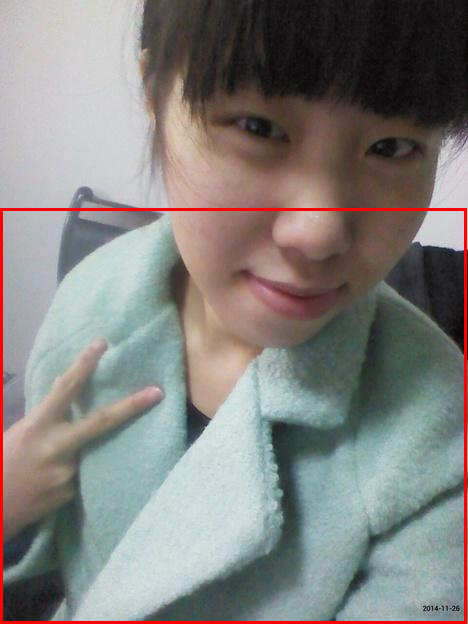

In [126]:
draw = ImageDraw.Draw(img)
draw.rectangle(file_df.loc['bounding_box','item1'], outline=(255,0,0), width = 3)

img

In [119]:
img.save('1.jpg')

In [ ]:
for i in